### Check that fields from CPL hist file match those from MOM6

bmom.e22.f09_t061_hycom1_N75.mct.surface_fluxes_check.007

Running for one year including all heating terms (after fixing a bug in latent heat)

In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot
import matplotlib

Basemap module not found. Some regional plots may not function properly


In [2]:
path= '/glade/scratch/gmarques/bmom.e22.f09_t061_hycom1_N75.mct.surface_fluxes_check.007/run/'
grd = MOM6grid(path+'ocean.mom6.static.nc')

MOM6 grid successfully loaded... 



In [3]:
area = np.ma.masked_where(grd.wet==0,grd.area_t)
xyplot(area,grd.geolon,grd.geolat)

In [4]:
xyplot(grd.area_t)

### Heat balance

#### After one year

In [5]:
# 007 - after one year, from cpl table: -0.6076 W / m^2
heat = (1.9786398873752909E+25-1.9799489234574726E+25) / (area.sum() * 3600. * 24 * 365.)
print(heat)
print(heat+0.6076)

-1.1537370412229302
-0.5461370412229302


In [6]:
# 007 - after one year, from cpl table: -0.6076 W / m^2
heat = (1.9786398873752909E+25-1.9799489234574726E+25) / (grd.area_t.sum() * 3600. * 24 * 365.)
print(heat)
print(heat+0.6076)

-0.8209286605275213
-0.2133286605275213


In [7]:
# 007 - after one year, from cpl table: -0.6076 W / m^2
heat = (1.9786398873752909E+25-1.9799489234574726E+25) / (4*np.pi*6367.e3**2 * 3600. * 24 * 365.)
print(heat)
print(heat+0.6076)

-0.8148270667986055
-0.20722706679860547


### MOM6 data

In [8]:
#ds_mom =  xr.open_dataset(path+'ocean.mom6.snap_0001.nc')
sfc_mom =  xr.open_dataset(path+'ocean.mom6.sfc_0001.nc')
frc_mom =  xr.open_dataset(path+'ocean.mom6.frc_0001.nc')

/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


### Net heat from CPL
heat_cpl = LW + SW + sen + lat + meltw 

LW


/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


SW
latent
sensible
seaice_melt_heat
net_heat_coupler


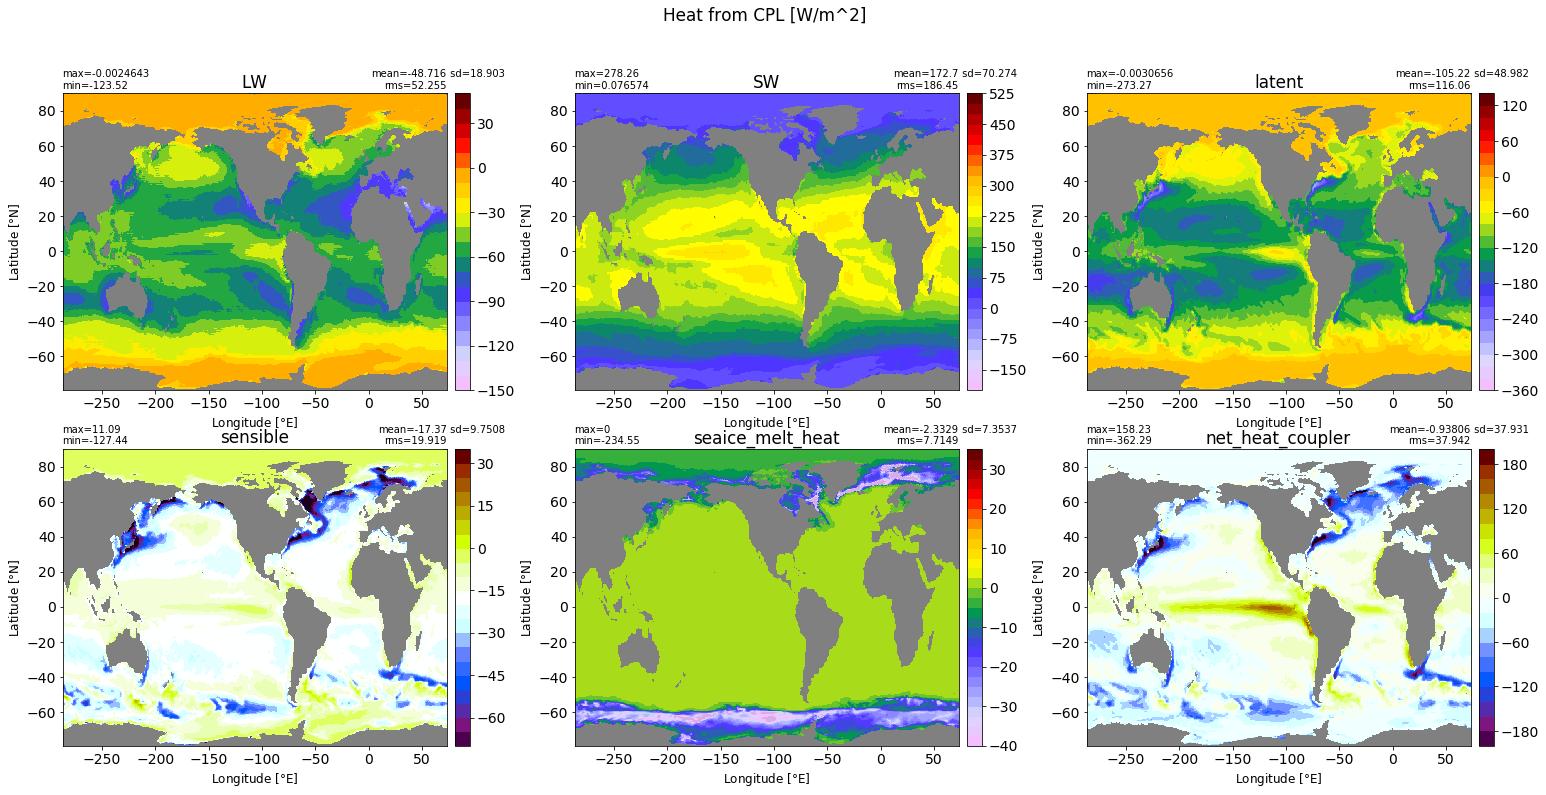

In [9]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 14})

fields = ['LW','SW',
         'latent','sensible','seaice_melt_heat',
         'net_heat_coupler']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26,12))
ax1 = ax.flatten()
plt.suptitle('Heat from CPL [W/m^2]')
for f in range(len(fields)):
    print(fields[f])
    dummy = np.ma.masked_invalid(frc_mom[fields[f]].mean(dim='time').values)
    xyplot(dummy, grd.geolon, grd.geolat, area, title=str(fields[f]), 
       axis=ax1[f], nbins=30,  sigma=5)

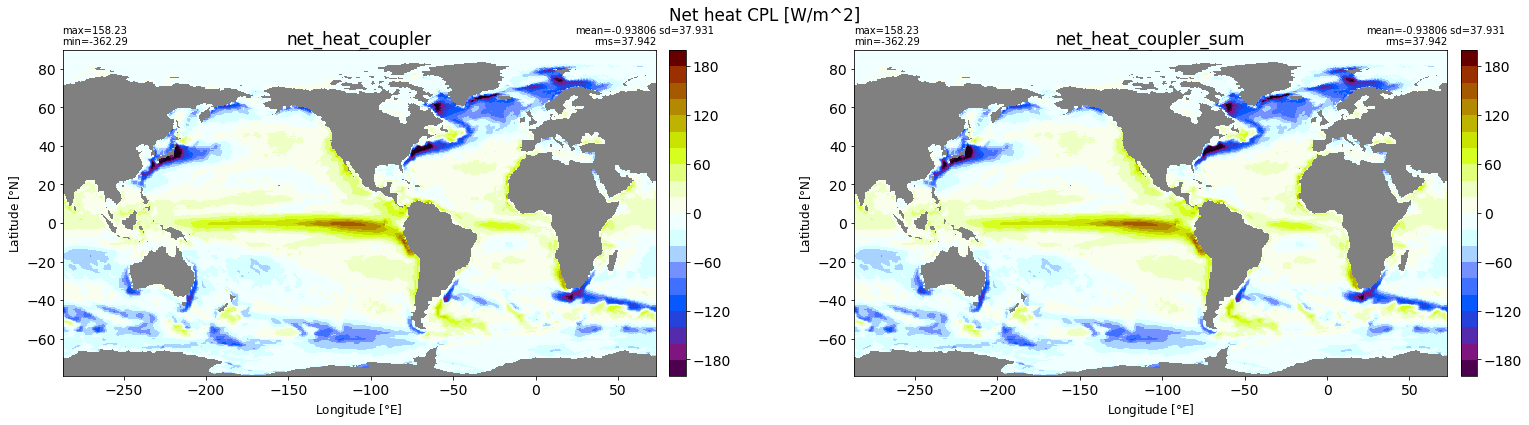

In [10]:
lw = np.ma.masked_invalid(frc_mom.LW.mean(dim='time').values)
sw = np.ma.masked_invalid(frc_mom.SW.mean(dim='time').values)
sensible = np.ma.masked_invalid(frc_mom.sensible.mean(dim='time').values)
latent = np.ma.masked_invalid(frc_mom.latent.mean(dim='time').values)
seaice_melt_heat = np.ma.masked_invalid(frc_mom.seaice_melt_heat.mean(dim='time').values)
net_heat_coupler = np.ma.masked_invalid(frc_mom.net_heat_coupler.mean(dim='time').values)

net_heat_coupler_sum = lw + sw + latent + sensible + seaice_melt_heat

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(26,6))
ax1 = ax.flatten()
plt.suptitle('Net heat CPL [W/m^2]')
xyplot(net_heat_coupler, grd.geolon, grd.geolat, area, title='net_heat_coupler', 
       axis=ax1[0], nbins=30,  sigma=5)
xyplot(net_heat_coupler_sum, grd.geolon, grd.geolat, area, title='net_heat_coupler_sum', 
       axis=ax1[1], nbins=30,  sigma=5)
    

latent_fprec_diag
latent_frunoff


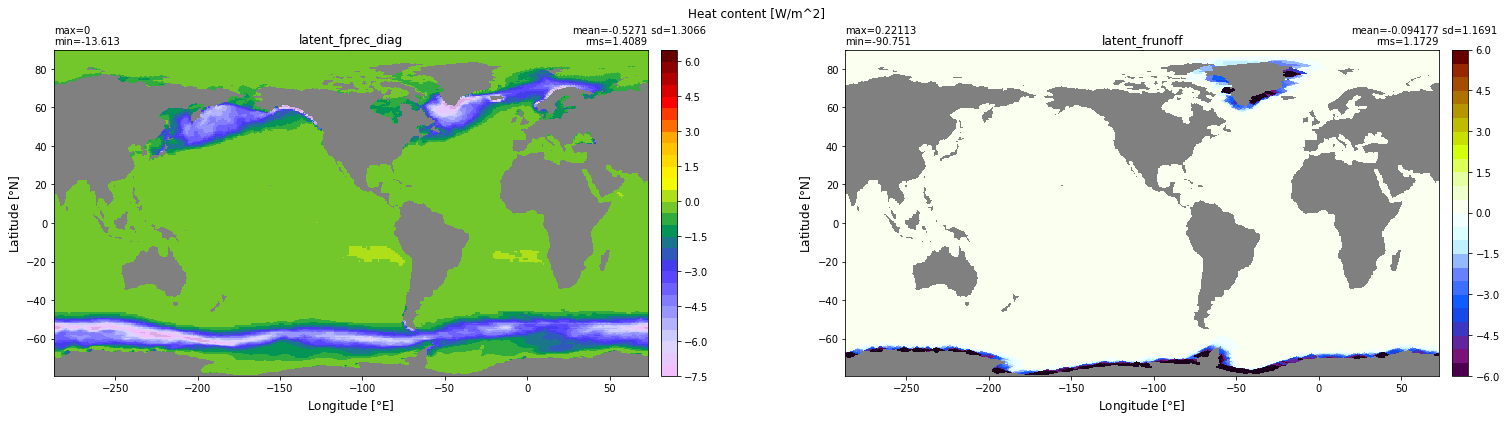

In [11]:
# latent
%matplotlib inline

fields = ['latent_fprec_diag','latent_frunoff']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(26,6))
ax1 = ax.flatten()
plt.suptitle('Heat content [W/m^2]')
for f in range(len(fields)):
    print(fields[f])
    dummy = np.ma.masked_invalid(frc_mom[fields[f]].mean(dim='time').values)
    xyplot(dummy, grd.geolon, grd.geolat, grd.area_t, title=str(fields[f]), 
       axis=ax1[f], nbins=30,  sigma=5)
    

### Heat from lprec, fprec, lrunoff, frunoff, icemelt and evap

heat_content_lrunoff
heat_content_frunoff
heat_content_icemelt
heat_content_cond
heat_content_lprec
heat_content_fprec


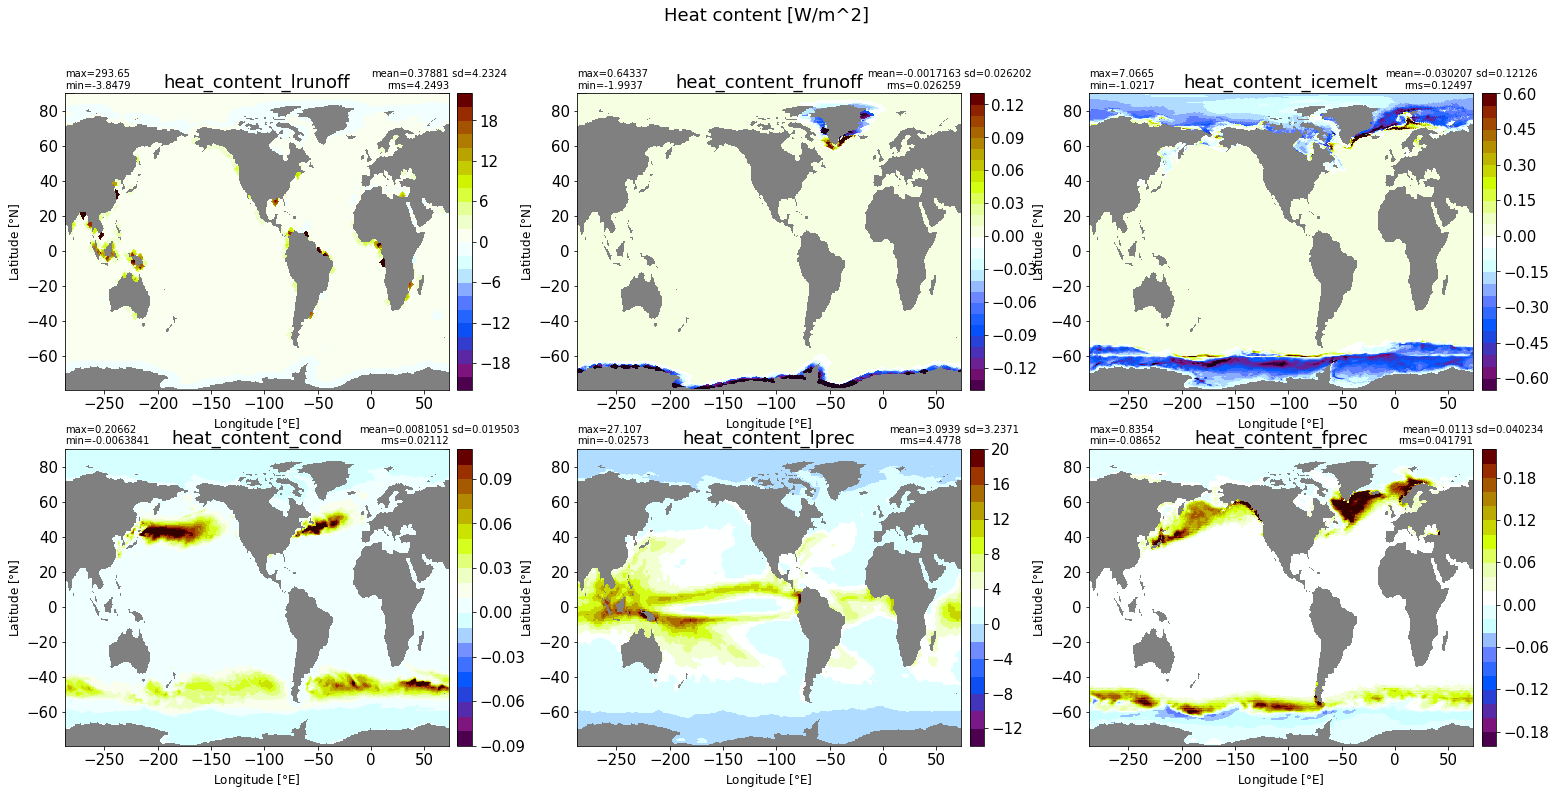

In [12]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 15})

fields = ['heat_content_lrunoff','heat_content_frunoff',
         'heat_content_icemelt','heat_content_cond','heat_content_lprec',
         'heat_content_fprec']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26,12))
ax1 = ax.flatten()
plt.suptitle('Heat content [W/m^2]')
for f in range(len(fields)):
    print(fields[f])
    dummy = np.ma.masked_invalid(frc_mom[fields[f]].mean(dim='time').values)
    xyplot(dummy, grd.geolon, grd.geolat, area, title=str(fields[f]), 
       axis=ax1[f], nbins=30,  sigma=5)
    

### Mass from lprec, fprec, lrunoff, frunoff, icemelt and evap

In [14]:
frc_mom.lprec

<xarray.DataArray 'lprec' (time: 12, yh: 458, xh: 540)>
[2967840 values with dtype=float64]
Coordinates:
  * yh       (yh) float64 -79.2 -79.08 -78.95 -78.82 ... 87.55 87.64 87.71 87.74
  * time     (time) object 0001-01-16 12:00:00 ... 0001-12-16 12:00:00
  * xh       (xh) float64 -286.7 -286.0 -285.3 -284.7 ... 70.67 71.33 72.0 72.67
Attributes:
    long_name:      Liquid precipitation into ocean
    units:          kg m-2 s-1
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: area_t
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  rainfall_flux

lrunoff
frunoff
seaice_melt
evap
lprec
fprec


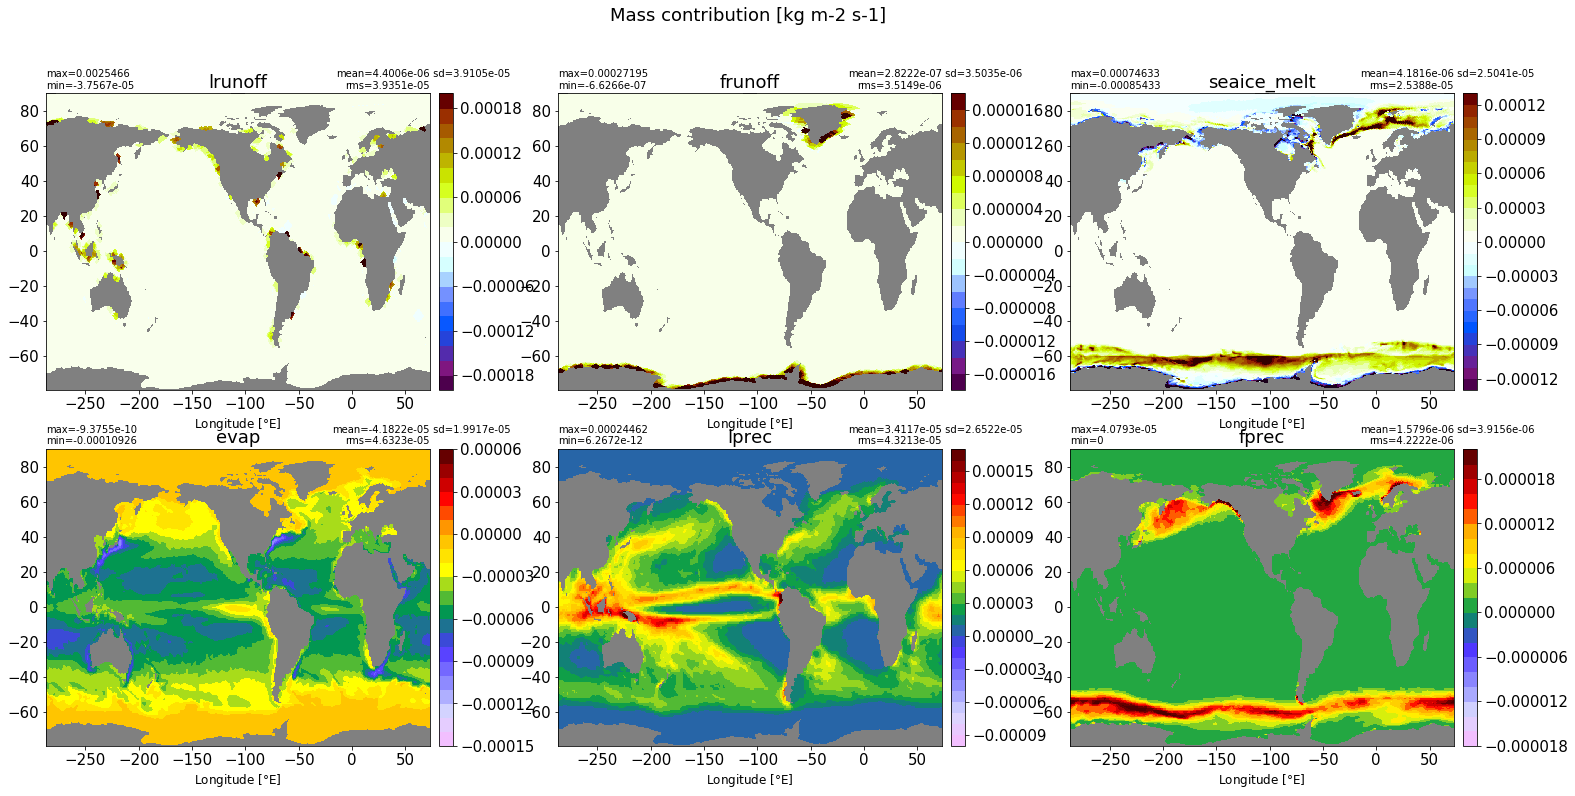

In [17]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 15})

fields = ['lrunoff','frunoff', 'seaice_melt','evap','lprec','fprec']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26,12))
ax1 = ax.flatten()
plt.suptitle('Mass contribution [kg m-2 s-1]')
for f in range(len(fields)):
    print(fields[f])
    dummy = np.ma.masked_invalid(frc_mom[fields[f]].mean(dim='time').values) * grd.wet
    xyplot(dummy, grd.geolon, grd.geolat, area, title=str(fields[f]), 
       axis=ax1[f], nbins=30,  sigma=5)
    ax1[f].set_ylabel('')

### Relation between heat_PmE, heat_content_massin, and heat_content_massout

Heat_PmE
heat_content_massout
heat_content_massin


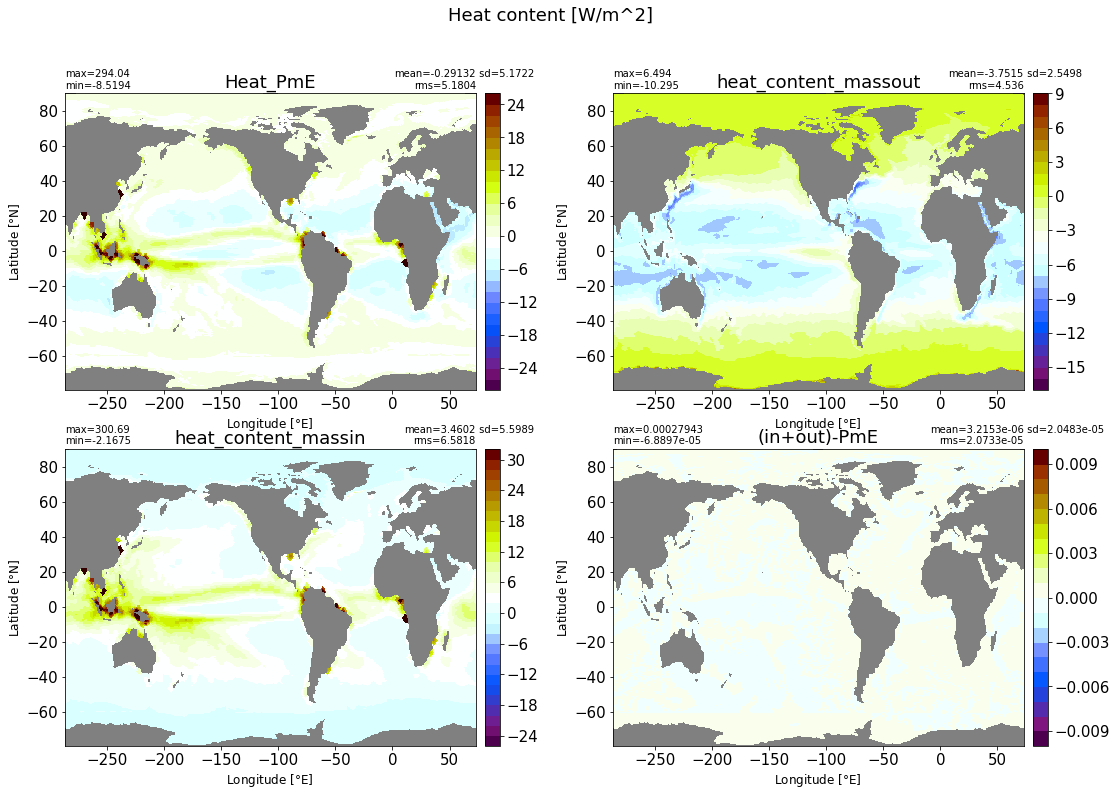

In [63]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 15})

fields = ['Heat_PmE','heat_content_massout','heat_content_massin']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
plt.suptitle('Heat content [W/m^2]')
for f in range(len(fields)):
    print(fields[f])
    dummy = np.ma.masked_invalid(frc_mom[fields[f]].mean(dim='time').values)
    xyplot(dummy, grd.geolon, grd.geolat, area, title=str(fields[f]), 
           axis=ax1[f], nbins=30,  sigma=5)

dummy2 = dummy + np.ma.masked_invalid(frc_mom[fields[1]].mean(dim='time').values) - \
         np.ma.masked_invalid(frc_mom[fields[0]].mean(dim='time').values)

xyplot(dummy2, grd.geolon, grd.geolat, grd.area_t, title='(in+out)-PmE', 
           axis=ax1[3], nbins=30,  clim=(-0.01,0.01))

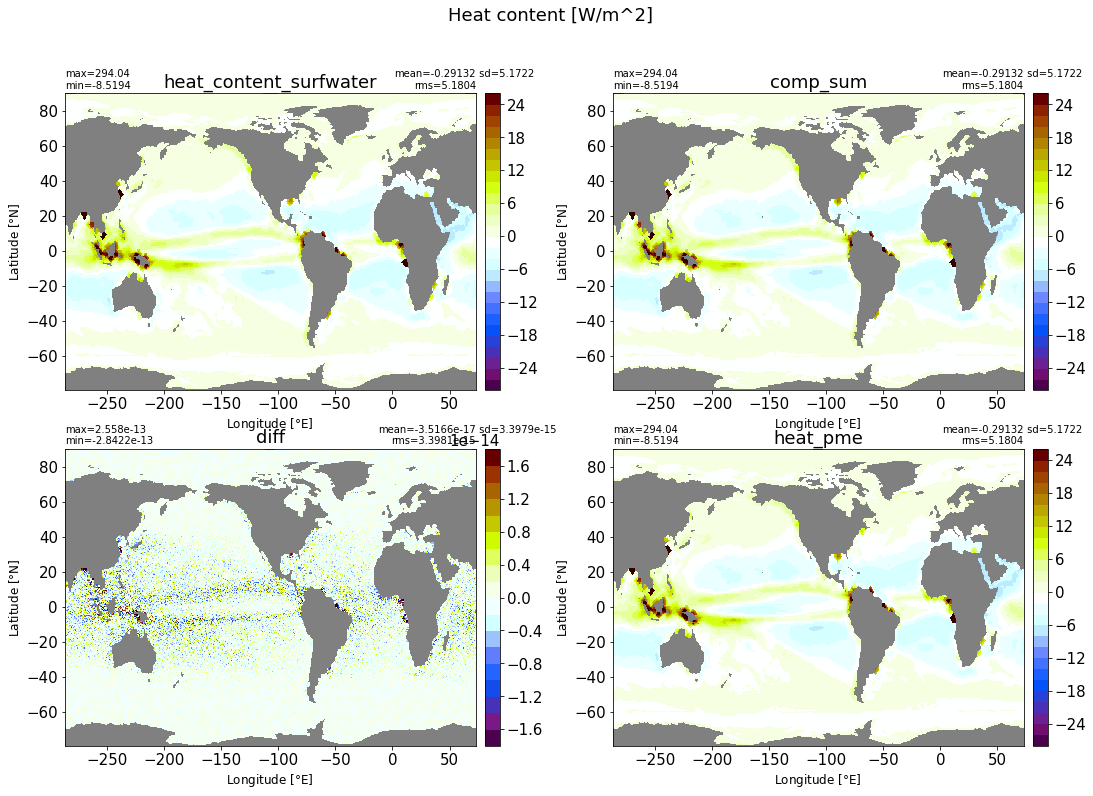

In [48]:
heat_content_lprec = np.ma.masked_invalid(frc_mom.heat_content_lprec.mean(dim='time').values)
heat_content_fprec = np.ma.masked_invalid(frc_mom.heat_content_fprec.mean(dim='time').values)
heat_content_meltw = np.ma.masked_invalid(frc_mom.heat_content_icemelt.mean(dim='time').values)
heat_content_frunoff = np.ma.masked_invalid(frc_mom.heat_content_frunoff.mean(dim='time').values)
heat_content_lrunoff = np.ma.masked_invalid(frc_mom.heat_content_lrunoff.mean(dim='time').values)
heat_content_cond = np.ma.masked_invalid(frc_mom.heat_content_cond.mean(dim='time').values)
heat_content_massout = np.ma.masked_invalid(frc_mom.heat_content_massout.mean(dim='time').values)
heat_content_surfwater = np.ma.masked_invalid(frc_mom.heat_content_surfwater.mean(dim='time').values)
heat_pme = np.ma.masked_invalid(frc_mom.Heat_PmE.mean(dim='time').values)

comp_sum = ( heat_content_lprec + heat_content_fprec  + heat_content_meltw
           + heat_content_frunoff + heat_content_cond + heat_content_massout + heat_content_lrunoff)

diff = comp_sum - heat_content_surfwater
fields = ['heat_content_surfwater','comp_sum','diff','heat_pme']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
plt.suptitle('Heat content [W/m^2]')

# heat_content_surfwater
xyplot(heat_content_surfwater, grd.geolon, grd.geolat, grd.area_t, title='heat_content_surfwater', 
           axis=ax1[0], nbins=30,  sigma=5)

# comp_sum
xyplot(comp_sum, grd.geolon, grd.geolat, grd.area_t, title='comp_sum', 
           axis=ax1[1], nbins=30,  sigma=5)

# diff
xyplot(diff, grd.geolon, grd.geolat, grd.area_t, title='diff', 
           axis=ax1[2], nbins=30,  sigma=5)

# heat_pme
xyplot(heat_pme, grd.geolon, grd.geolat, grd.area_t, title='heat_pme', 
           axis=ax1[3], nbins=30,  sigma=5)
